-1.0284914473169948 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.028491447316995
-1.0827132505678423 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.082713250567842
-3.3965911446193653 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  3.3965911446193635
-1.0196060273704444 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0196060273704435


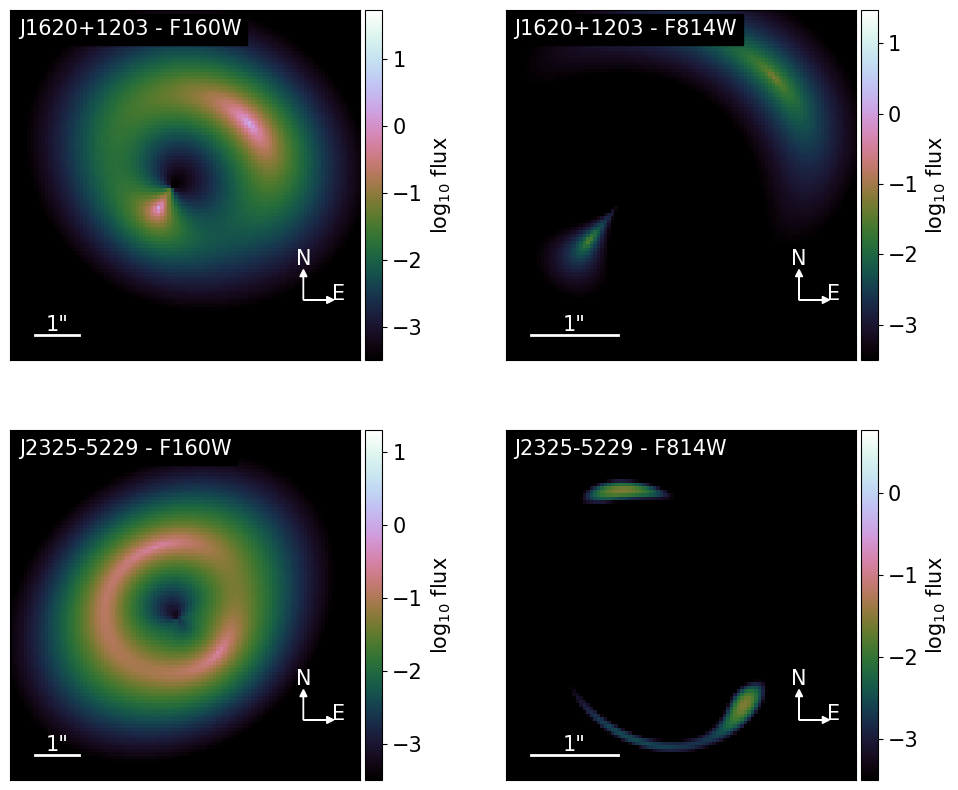

In [6]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system name
names = ['J1620+1203', 'J2325-5229']
filters = ['F160W', 'F814W']
fontsize = 18

nrows = len(names)
ncols = len(filters)
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8))

# Ensure axes is always 2D
if nrows == 1:
    axes = [axes]
if ncols == 1:
    axes = [[ax] for ax in axes]

for i, name in enumerate(names):
    for j, filter in enumerate(filters):
        filename = f"../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

        with open(filename, "rb") as f:
            loaded_data = pickle.load(f)

        kwargs_result = loaded_data["kwargs_result"]
        multi_band_list = loaded_data["multi_band_list"]
        kwargs_model = loaded_data["kwargs_model"]
        if filter == 'F160W':
            mask_list = loaded_data['kwargs_likelihood']['image_likelihood_mask_list']

            # initialize model plot
            modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, 
                              image_likelihood_mask_list=mask_list, 
                              arrow_size=0.02, cmap_string="cubehelix")

        else:
            modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, 
                              arrow_size=0.02, cmap_string="cubehelix")

        # plot only the source light
        modelPlot.decomposition_plot(
            ax=axes[i][j], 
            text=f"{name} - {filter}", 
            source_add=True, 
            unconvolved=True, 
            v_min=-3.5
        )

plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.2)
plt.show()


/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:67: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:224: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:1111: RuntimeWarning: divide by zero encountered in log10
  np.log10(model),


-2.5847572568987336 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.5847572568987345
-1.0196060273704444 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0196060273704435


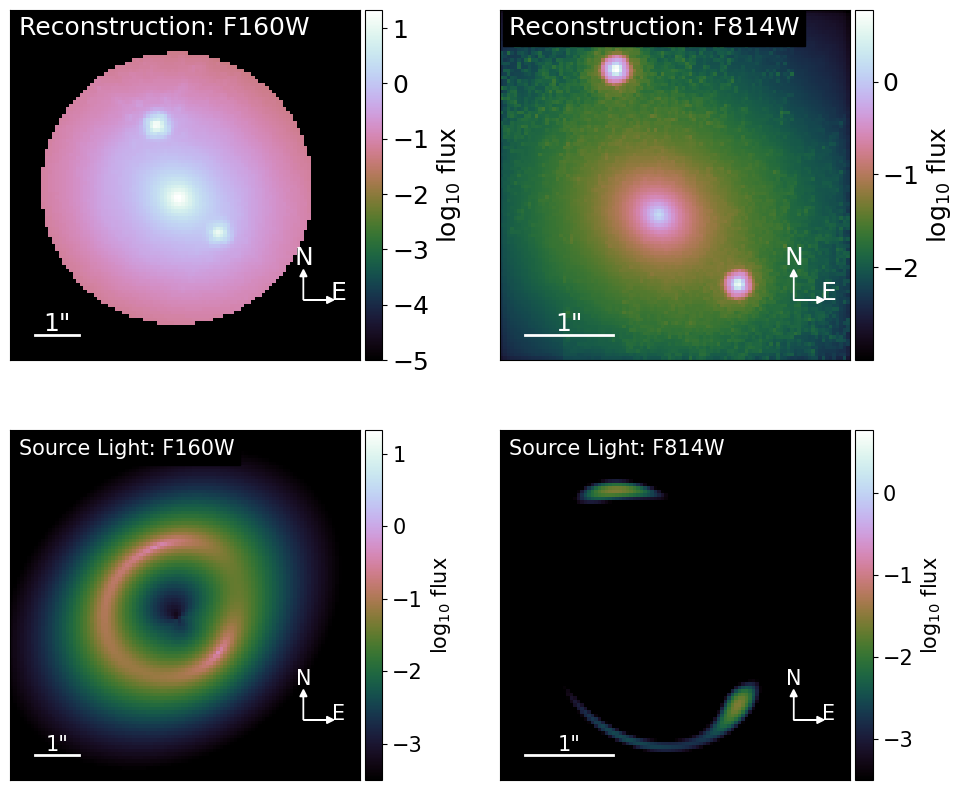

In [1]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system name
names = ['J2325-5229']
filters = ['F160W', 'F814W']
fontsize = 18

# Setup figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows: model_plot, decomposition_plot

for j, filter in enumerate(filters):
    name = names[0]  # You only have one name

    filename = f"../cutout_data/{name}/{filter}/{name}_{filter}.pkl"
    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    kwargs_result = loaded_data["kwargs_result"]
    multi_band_list = loaded_data["multi_band_list"]
    kwargs_model = loaded_data["kwargs_model"]

    if filter == 'F160W':
        mask_list = loaded_data['kwargs_likelihood']['image_likelihood_mask_list']
        modelPlot = ModelPlot(
            multi_band_list, kwargs_model, kwargs_result,
            image_likelihood_mask_list=mask_list,
            arrow_size=0.02, cmap_string="cubehelix"
        )
    else:
        modelPlot = ModelPlot(
            multi_band_list, kwargs_model, kwargs_result,
            arrow_size=0.02, cmap_string="cubehelix"
        )

    # Top row: model plot
    modelPlot.model_plot(
        ax=axes[0, j],
        font_size=fontsize,
        text=f"Reconstruction: {filter}"
    )

    # Bottom row: source-only decomposition
    modelPlot.decomposition_plot(
        ax=axes[1, j],
        text=f"Source Light: {filter}",
        source_add=True,
        unconvolved=True,
        v_min=-3.5
    )

plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.2)
plt.show()
